In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


In [2]:
MedianHouseholdIncome2015 = pd.read_csv('fatal/MedianHouseholdIncome2015.csv', encoding = "ISO-8859-1")
MedianHouseholdIncome2015.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [3]:
PercentagePeopleBelowPovertyLevel = pd.read_csv('fatal/PercentagePeopleBelowPovertyLevel.csv', encoding = "ISO-8859-1")
PercentagePeopleBelowPovertyLevel.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [4]:
PercentOver25CompletedHighSchool = pd.read_csv('fatal/PercentOver25CompletedHighSchool.csv', encoding = "ISO-8859-1")
PercentOver25CompletedHighSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [5]:
PoliceKillingsUS = pd.read_csv('fatal/PoliceKillingsUS.csv', encoding = "ISO-8859-1")
PoliceKillingsUS.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [6]:
ShareRaceByCity = pd.read_csv('fatal/ShareRaceByCity.csv', encoding = "ISO-8859-1")
ShareRaceByCity.head(1)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6


In [7]:
PercentagePeopleBelowPovertyLevel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area    29329 non-null object
City               29329 non-null object
poverty_rate       29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


In [8]:
null_cols = MedianHouseholdIncome2015.isnull().sum()
null_cols[null_cols > 0]

Median Income    51
dtype: int64

In [9]:
null_cols = PercentagePeopleBelowPovertyLevel.isnull().sum()
null_cols[null_cols > 0]

Series([], dtype: int64)

In [10]:
null_cols = PercentOver25CompletedHighSchool.isnull().sum()
null_cols[null_cols > 0]

Series([], dtype: int64)

In [11]:
null_cols = PoliceKillingsUS.isnull().sum()
null_cols[null_cols > 0]

armed      9
age       77
race     195
flee      65
dtype: int64

In [12]:
null_cols = ShareRaceByCity.isnull().sum()
null_cols[null_cols > 0]

Series([], dtype: int64)

In [13]:
PercentagePeopleBelowPovertyLevel['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

# Cleaning Nulls

In [14]:
def cleannull1(PoliceKillingsUS):
    PoliceKillingsUS['age'] = PoliceKillingsUS.age.replace(np.NaN, 'Unknown')
    PoliceKillingsUS['armed'] = PoliceKillingsUS.armed.replace(np.NaN, 'Unknown')
    PoliceKillingsUS['race'] = PoliceKillingsUS.race.replace(np.NaN, 'Not identified')
    PoliceKillingsUS['flee'] = PoliceKillingsUS.flee.replace(np.NaN, 'Unknown')
    return PoliceKillingsUS


In [15]:
MedianHouseholdIncome2015 = MedianHouseholdIncome2015.rename(index=str, columns={'Median Income': 'median_income'})

In [16]:
MedianHouseholdIncome2015['median_income'] = MedianHouseholdIncome2015.median_income.replace(np.NaN, 'Unknown')

In [17]:
MedianHouseholdIncome2015.head()

,Geographic Area,City,median_income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


# Uniendo datos

Utilizando la tabla de pobreza por estado (PercentagePeopleBelowPovertyLevel)

In [18]:
#def pobrezaestado(PercentagePeopleBelowPovertyLevel):
PercentagePeopleBelowPovertyLevel.poverty_rate.replace(['-'],0.0,inplace = True)
PercentagePeopleBelowPovertyLevel.poverty_rate = PercentagePeopleBelowPovertyLevel.poverty_rate.astype(float)
area_list = list(PercentagePeopleBelowPovertyLevel['Geographic Area'].unique())

area_poverty_ratio = []

for x in area_list:
    a = PercentagePeopleBelowPovertyLevel[PercentagePeopleBelowPovertyLevel['Geographic Area'] == x]
    area_poverty_rate = sum(a.poverty_rate)/len(a)
    area_poverty_ratio.append(area_poverty_rate)
    
data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})
nuevo_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values
datos_unidos = data.reindex(nuevo_index)
    #return datos_unidos

Text(0.5, 1.0, 'Poverty Rate by State')

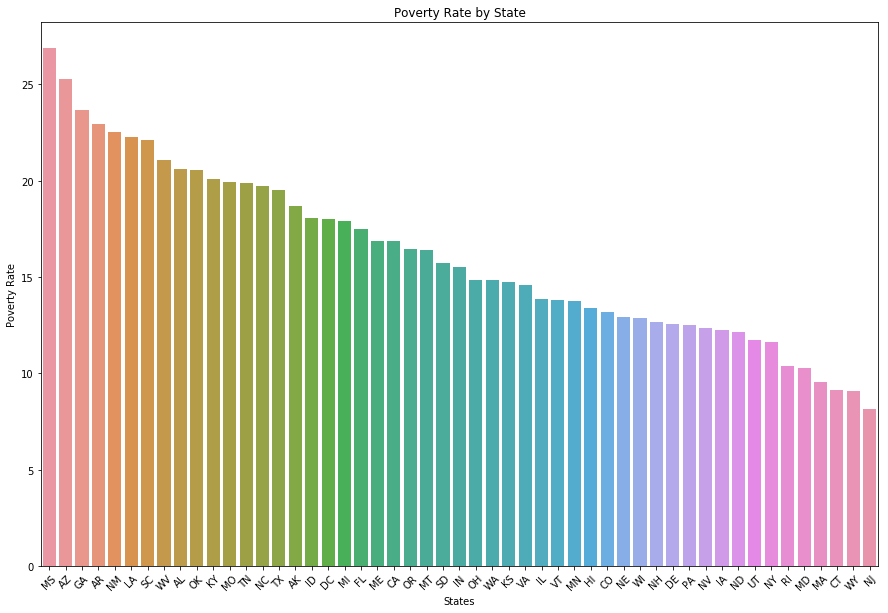

In [19]:
#def visual_pobrezaestado(datos_unidos):
plt.figure(figsize=(15,10))
sns.barplot(x=datos_unidos['area_list'], y=datos_unidos['area_poverty_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate by State')
    #return datos_unidos

[Text(0, 0.5, 'Estados'),
 Text(0.5, 0, 'Porcentaje de razas'),
 Text(0.5, 1.0, 'Porcentaje de raza por Estado')]

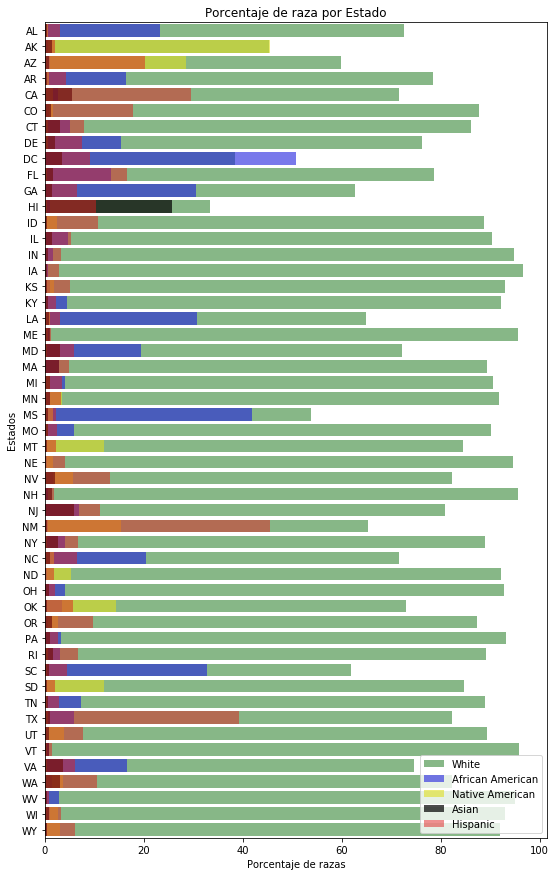

In [20]:
ShareRaceByCity.replace(['-'],0.0,inplace = True)
ShareRaceByCity.replace(['(X)'],0.0,inplace = True)
ShareRaceByCity.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = ShareRaceByCity.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
area_list = list(ShareRaceByCity['Geographic area'].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
for i in area_list:
    x = ShareRaceByCity[ShareRaceByCity['Geographic area']==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black) / len(x))
    share_native_american.append(sum(x.share_native_american) / len(x))
    share_asian.append(sum(x.share_asian) / len(x))
    share_hispanic.append(sum(x.share_hispanic) / len(x))

f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=share_white,y=area_list,color='green',alpha = 0.5,label='White' )
sns.barplot(x=share_black,y=area_list,color='blue',alpha = 0.6,label='African American')
sns.barplot(x=share_native_american,y=area_list,color='yellow',alpha = 0.6,label='Native American')
sns.barplot(x=share_asian,y=area_list,color='black',alpha = 0.7,label='Asian')
sns.barplot(x=share_hispanic,y=area_list,color='red',alpha = 0.5,label='Hispanic')

ax.legend(loc='lower right',frameon = True)
ax.set(xlabel='Porcentaje de razas', ylabel='Estados',title = "Porcentaje de raza por Estado")
plt.show()

In [21]:
PercentOver25CompletedHighSchool.percent_completed_hs.replace(['-'],0.0,inplace = True)
PercentOver25CompletedHighSchool.percent_completed_hs = PercentOver25CompletedHighSchool.percent_completed_hs.astype(float)

area_list = list(PercentOver25CompletedHighSchool['Geographic Area'].unique())
area_highschool = []

for i in area_list:
    x = PercentOver25CompletedHighSchool[PercentOver25CompletedHighSchool['Geographic Area'] == i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
    

data = pd.DataFrame({'area_list': area_list,'area_highschool_ratio':area_highschool})
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
datos_unidos2 = data.reindex(new_index)

datos_unidos['area_poverty_ratio'] = datos_unidos['area_poverty_ratio']/max(datos_unidos['area_poverty_ratio'])
datos_unidos2['area_highschool_ratio'] = datos_unidos2['area_highschool_ratio']/max(datos_unidos2['area_highschool_ratio'])
data = pd.concat([datos_unidos, datos_unidos2['area_highschool_ratio']], axis=1)
data.sort_values('area_poverty_ratio',inplace=True)

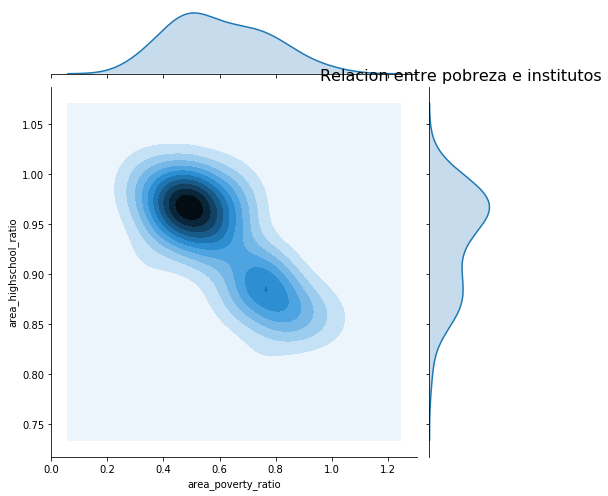

In [39]:
institutospobreza = sns.jointplot(data.area_poverty_ratio, data.area_highschool_ratio, kind = "kde", height = 7)
plt.title('Relacion entre pobreza e institutos',color = 'black',fontsize=16)
plt.show()

Text(0.5, 1.0, 'Arma asesina')

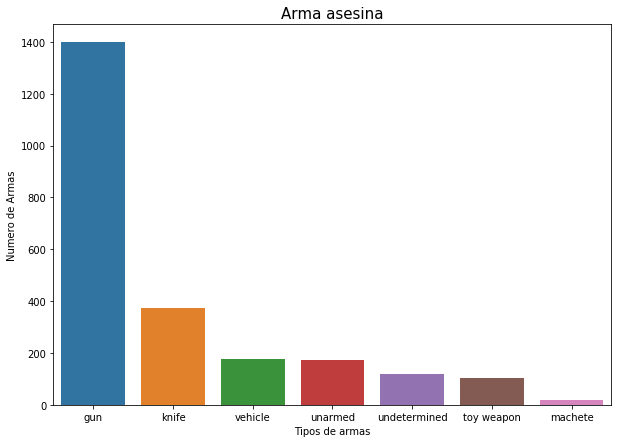

In [29]:
armainvolucrada = PoliceKillingsUS.armed.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x = armainvolucrada[:7].index,y = armainvolucrada[:7].values)
plt.ylabel('Numero de Armas')
plt.xlabel('Tipos de armas')
plt.title('Arma asesina',color = 'black',fontsize=15)
plt.show()

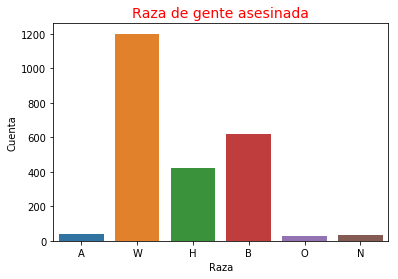

In [42]:
sns.countplot(data=PoliceKillingsUS, x='race')
plt.ylabel('Cuenta')
plt.xlabel('Raza')
plt.title('Raza de gente asesinada',color = 'red',fontsize=14)
plt.show()

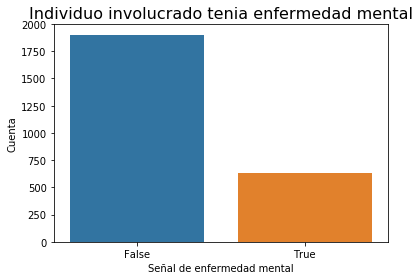

In [43]:
sns.countplot(data=PoliceKillingsUS, x='signs_of_mental_illness')
plt.ylabel('Cuenta')
plt.xlabel('Señal de enfermedad mental')
plt.title('Individuo involucrado tenia enfermedad mental',color = 'black',fontsize=16)
plt.show()

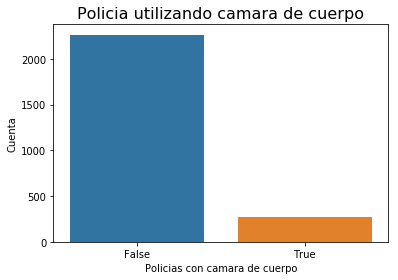

In [44]:
sns.countplot(data=PoliceKillingsUS, x='body_camera')
plt.ylabel('Cuenta')
plt.xlabel('Policias con camara de cuerpo')
plt.title('Policia utilizando camara de cuerpo',color = 'black',fontsize=16)
plt.show()

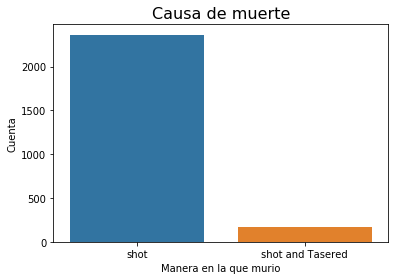

In [45]:
sns.countplot(data=PoliceKillingsUS, x='manner_of_death')
plt.ylabel('Cuenta')
plt.xlabel('Manera en la que murio')
plt.title('Causa de muerte',color = 'black',fontsize=16)
plt.show()

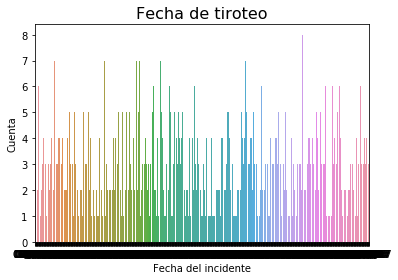

In [51]:
sns.countplot(data=PoliceKillingsUS, x='date')
plt.ylabel('Cuenta')
plt.xlabel('Fecha del incidente')
plt.title('Fecha de tiroteo',color = 'black',fontsize=16)
plt.show()